In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b9b4dc8f-bd05-4569-8e02-cf145bdee333',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-11T09:44:26.847Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10864, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10864,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965112e+07,1.965112e+07,False,NaN,1,NaN,NaN,None,2024-03-11T09:44:00.000Z,71533.585753,4.871934e+10,82.1421,0.469192,2.568012,9.412576,51.494840,54.512876,70.942919,1.405715e+12,52.1649,1.502205e+12,None,2024-03-11T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
1,1027,Ethereum,ETH,ethereum,8523,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200981e+08,1.200981e+08,True,NaN,2,NaN,NaN,None,2024-03-11T09:44:00.000Z,4011.291134,2.325930e+10,80.5845,0.261244,1.540930,13.536793,60.878531,53.458109,79.994623,4.817484e+11,17.8708,4.817484e+11,None,2024-03-11T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
2,825,Tether USDt,USDT,tether,77681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.020181e+11,1.067971e+11,True,NaN,3,NaN,NaN,None,2024-03-11T09:42:00.000Z,1.000129,9.739593e+10,44.8741,-0.013089,-0.188344,-0.051020,-0.057714,0.012655,0.027818,1.020313e+11,3.7849,1.068109e+11,None,2024-03-11T09:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 15:14:34.680971
3,1839,BNB,BNB,bnb,2087,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495400e+08,1.495400e+08,False,NaN,4,NaN,NaN,None,2024-03-11T09:43:00.000Z,528.764108,5.072484e+09,77.4414,0.054282,2.122468,25.073411,64.087244,68.655260,112.013877,7.907138e+10,2.9332,7.907138e+10,None,2024-03-11T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.434112e+08,5.715294e+08,True,NaN,5,NaN,NaN,None,2024-03-11T09:43:00.000Z,148.658477,4.693969e+09,59.8856,-0.072107,1.700959,11.545587,36.698385,47.200051,107.874532,6.591684e+10,2.4452,8.496268e+10,None,2024-03-11T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
5,52,XRP,XRP,xrp,1245,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.473683e+10,9.998782e+10,False,NaN,6,NaN,NaN,None,2024-03-11T09:44:00.000Z,0.627216,2.116948e+09,43.0386,0.872045,0.716716,-2.035253,19.553132,4.546218,0.854905,3.433183e+10,1.2736,6.272163e+10,None,2024-03-11T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
6,3408,USDC,USDC,usd-coin,17143,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.021031e+10,3.021031e+10,False,NaN,7,NaN,NaN,None,2024-03-11T09:42:00.000Z,0.999915,9.389247e+09,55.2015,-0.009851,0.006490,-0.009539,-0.006152,-0.007857,-0.015890,3.020775e+10,1.1206,3.020775e+10,None,2024-03-11T09:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 15:14:34.680971
7,2010,Cardano,ADA,cardano,1092,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.555086e+10,3.670029e+10,False,NaN,8,NaN,NaN,None,2024-03-11T09:42:00.000Z,0.738682,8.603570e+08,43.7812,0.265746,0.891401,-6.870187,37.933768,26.993667,25.553309,2.626078e+10,0.9734,3.324069e+10,None,2024-03-11T09:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:34.680971
8,74,Dogecoin,DOGE,dogecoin,916,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.43

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b9b4dc8f-bd05-4569-8e02-cf145bdee333',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"D:\g\API.csv"):
        df.to_csv(r"D:\g\API.csv", header = 'column_names')
    else:
        df.to_csv(r"D:\g\API.csv",mode = 'a', header = False)

In [40]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [41]:
pd.set_option('display.float_format', lambda x : '%.5f' %x)


In [9]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10864,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19651125.00000,19651125.00000,False,NaN,1,NaN,NaN,None,2024-03-11T09:44:00.000Z,71533.58575,48719338211.08541,82.14210,0.46919,2.56801,9.41258,51.49484,54.51288,70.94292,1405715435335.33325,52.16490,1502205300818.25000,None,2024-03-11T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:43.052986
1,1027,Ethereum,ETH,ethereum,8523,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120098097.13109,120098097.13109,True,NaN,2,NaN,NaN,None,2024-03-11T09:44:00.000Z,4011.29113,23259304033.12098,80.58450,0.26124,1.54093,13.53679,60.87853,53.45811,79.99462,481748432278.99194,17.87080,481748432278.98999,None,2024-03-11T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:43.052986
2,825,Tether USDt,USDT,tether,77681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,102018133001.26607,106797122778.30690,True,NaN,3,NaN,NaN,None,2024-03-11T09:42:00.000Z,1.00013,97395930508.16994,44.87410,-0.01309,-0.18834,-0.05102,-0.05771,0.01265,0.02782,102031301500.48584,3.78490,106810908149.46001,None,2024-03-11T09:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 15:14:43.052986
3,1839,BNB,BNB,bnb,2087,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149539997.02428,149539997.02428,False,NaN,4,NaN,NaN,None,2024-03-11T09:43:00.000Z,528.76411,5072484344.33914,77.44140,0.05428,2.12247,25.07341,64.08724,68.65526,112.01388,79071383104.40033,2.93320,79071383104.39999,None,2024-03-11T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:43.052986
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443411249.80473,571529358.99909,True,NaN,5,NaN,NaN,None,2024-03-11T09:43:00.000Z,148.65848,4693969143.34464,59.88560,-0.07211,1.70096,11.54559,36.69839,47.20005,107.87453,65916841280.14338,2.44520,84962684326.74001,None,2024-03-11T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 15:14:43.052986


In [42]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.31062,2.42265,10.10922,52.02454,55.03226,71.43281
Ethereum,0.61720,1.92863,14.76894,61.84241,54.31390,81.13410
Tether USDt,-0.00628,-0.16574,-0.06285,-0.05182,0.00468,0.03299
BNB,-0.27330,0.21891,25.58857,63.91267,68.48873,110.70544
Solana,-0.40140,0.41920,10.91585,36.29210,47.10471,106.85202
XRP,0.62997,0.83212,-3.15358,20.12572,4.66767,1.02397
USDC,0.02546,0.00874,-0.01728,0.01480,-0.00427,-0.00083
Cardano,0.71527,1.32852,-6.72916,38.81638,26.64777,25.77101
Dogecoin,0.11093,1.24489,8.50719,117.53590,109.84115,82.98678


In [43]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.31062
             quote.USD.percent_change_24h     2.42265
             quote.USD.percent_change_7d     10.10922
             quote.USD.percent_change_30d    52.02454
             quote.USD.percent_change_60d    55.03226
             quote.USD.percent_change_90d    71.43281
Ethereum     quote.USD.percent_change_1h      0.61720
             quote.USD.percent_change_24h     1.92863
             quote.USD.percent_change_7d     14.76894
             quote.USD.percent_change_30d    61.84241
             quote.USD.percent_change_60d    54.31390
             quote.USD.percent_change_90d    81.13410
Tether USDt  quote.USD.percent_change_1h     -0.00628
             quote.USD.percent_change_24h    -0.16574
             quote.USD.percent_change_7d     -0.06285
             quote.USD.percent_change_30d    -0.05182
             quote.USD.percent_change_60d     0.00468
             quote.USD.percent_change_90

In [44]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.31062
            quote.USD.percent_change_24h   2.42265
            quote.USD.percent_change_7d   10.10922
            quote.USD.percent_change_30d  52.02454
            quote.USD.percent_change_60d  55.03226
            quote.USD.percent_change_90d  71.43281
Ethereum    quote.USD.percent_change_1h    0.61720
            quote.USD.percent_change_24h   1.92863
            quote.USD.percent_change_7d   14.76894
            quote.USD.percent_change_30d  61.84241
            quote.USD.percent_change_60d  54.31390
            quote.USD.percent_change_90d  81.13410
Tether USDt quote.USD.percent_change_1h   -0.00628
            quote.USD.percent_change_24h  -0.16574
            quote.USD.percent_change_7d   -0.06285
            quote.USD.percent_change_30d  -0.05182
            quote.USD.percent_change_60d   0.00468
            quote.USD.percent_change_90d   0.03299
BNB         quote.USD.percent_change_1h   -0.27330
            quote.USD.percent_change_24h   0.21891
            quote.USD.percent_change_7d   25.58857
            quote.USD.percent_change_30d  63.91267
            quote.USD.percent_change_60d  68.48873
            quote.USD.percent_change_90d 110.70544
Solana      quote.USD.percent_change_1h   -0.40140
            quote.USD.percent_change_24h   0.41920
            quote.USD.percent_change_7d   10.91585
            quote.USD.percent_change_30d  36.29210
            quote.USD.percent_change_60d  47.10471
            quote.USD.percent_change_90d 106.85202
XRP         quote.USD.percent_change_1h    0.62997
            quote.USD.percent_change_24h   0.83212
            quote.USD.percent_change_7d   -3.15358
            quote.USD.percent_change_30d  20.12572
            quote.USD.percent_change_60d   4.66767
            quote.USD.percent_change_90d   1.02397
USDC        quote.USD.percent_change_1h    0.02546
            quote.USD.percent_change_24h   0.00874
            quote.USD.percent_change_7d   -0.01728
            quote.USD.percent_change_30d   0.01480
            quote.USD.percent_change_60d  -0.00427
            quote.USD.percent_change_90d  -0.00083
Cardano     quote.USD.percent_change_1h    0.71527
            quote.USD.percent_change_24h   1.32852
            quote.USD.percent_change_7d   -6.72916
            quote.USD.percent_change_30d  38.81638
            quote.USD.percent_change_60d  26.64777
            quote.USD.percent_change_90d  25.77101
Dogecoin    quote.USD.percent_change_1h    0.11093
            quote.USD.percent_change_24h   1.24489
            quote.USD.percent_change_7d    8.50719
            quote.USD.percent_change_30d 117.53590
            quote.USD.percent_change_60d 109.84115
            quote.USD.percent_change_90d  82.98678
Shiba Inu   quote.USD.percent_change_1h   -0.41532
            quote.USD.percent_change_24h  -0.19736
            quote.USD.percent_change_7d   32.03208
            quote.USD.percent_change_30d 267.30012
            quote.USD.percent_change_60d 235.29798
            quote.USD.percent_change_90d 255.98332
Avalanche   quote.USD.percent_change_1h    4.17947
            quote.USD.percent_change_24h   6.75892
            quote.USD.percent_change_7d    4.84184
            quote.USD.percent_change_30d  18.16074
            quote.USD.percent_change_60d  18.43205
            quote.USD.percent_change_90d  11.94469
Polkadot    quote.USD.percent_change_1h    1.92398
            quote.USD.percent_change_24h   3.65241
            quote.USD.percent_change_7d    7.38234
            quote.USD.percent_change_30d  52.12927
            quote.USD.percent_change_60d  30.30454
            quote.USD.percent_change_90d  52.32103
Chainlink   quote.USD.percent_change_1h   -0.08260
            quote.USD.percent_change_24h   7.46811
            quote.USD.percent_change_7d    3.87494
            quote.USD.percent_change_30d  17.42787
            quote.USD.percent_change_60d  40.94071
            quo

<Axes: xlabel='name'>

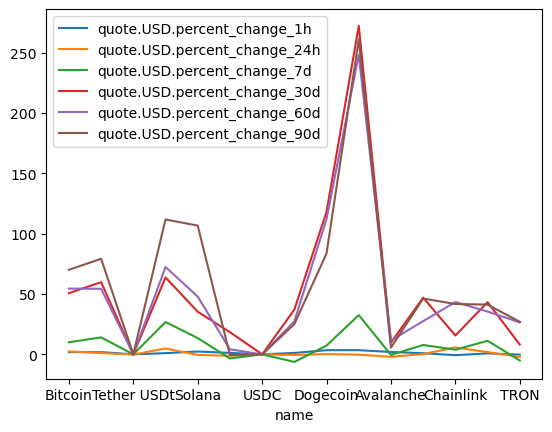

In [13]:
count = df5.count()

In [45]:
index = pd.Index(range(90))
df6 = df5.set_index(index)
df6

,values
0,0.31062
1,2.42265
2,10.10922
3,52.02454
4,55.03226
5,71.43281
6,0.61720
7,1.92863
8,14.76894
9,61.84241


In [46]:
df6 = df5.reset_index()

In [47]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


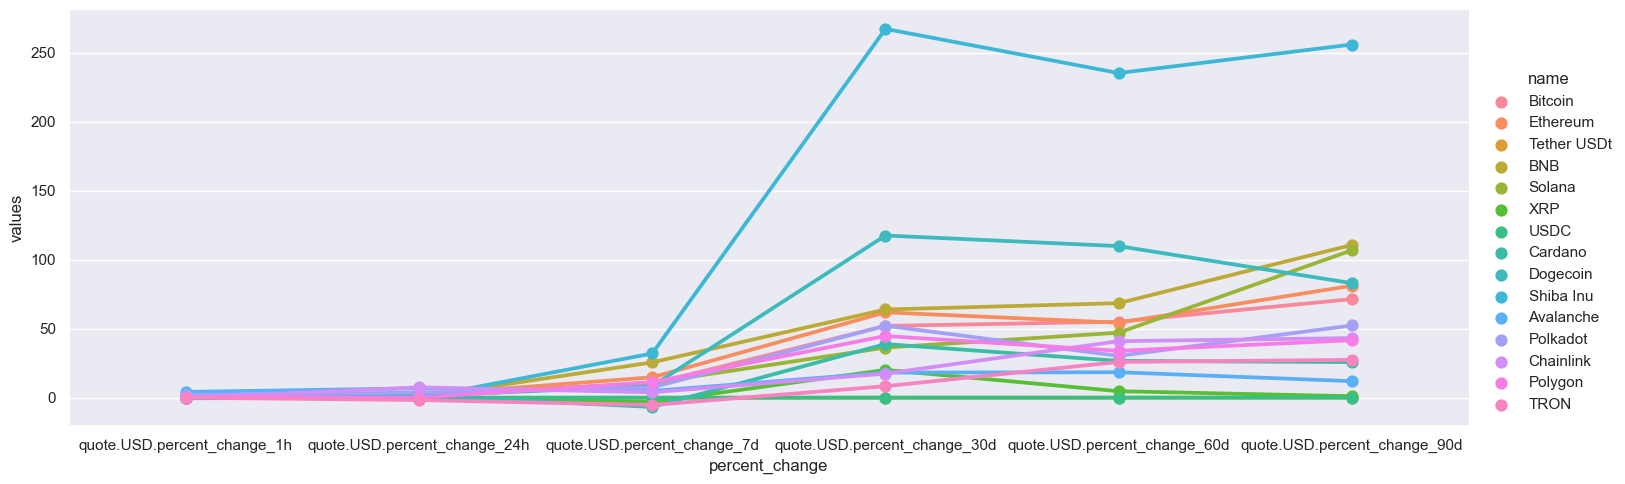

In [49]:
sns.catplot(x = 'percent_change',y = 'values', hue = 'name',data = df7, kind = 'point',aspect = 3, height = 5)